<a href="https://colab.research.google.com/github/Hyeeun98/kaggle_competition/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/parkdonggyu/walmart-final-v3-0

#데이터 불러오기

In [ ]:
!pip install kaggle --upgrade

In [ ]:
import os

#내 계정 > Account > API > Create New API Token
os.environ['KAGGLE_USERNAME'] = ('hyeyoo')
os.environ['KAGGLE_KEY'] = ('3b5e17993455496811f8a4a3686e25db')

!kaggle -h

# kaggle competition > data > API복사
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 58.4MB/s]
  0% 0.00/532 [00:00<?, ?B/s]
100% 532/532 [00:00<00:00, 1.37MB/s]
  0% 0.00/2.47M [00:00<?, ?B/s]
100% 2.47M/2.47M [00:00<00:00, 81.6MB/s]
  0% 0.00/

In [ ]:
!unzip '*zip'

Archive:  sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    

Archive:  features.csv.zip
  inflating: features.csv            

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  train.csv.zip
  inflating: train.csv               

4 archives were successfully processed.


In [ ]:
! ls

features.csv	  sampleSubmission.csv	    test.csv	  train.csv.zip
features.csv.zip  sampleSubmission.csv.zip  test.csv.zip
sample_data	  stores.csv		    train.csv


#데이터 확인

In [ ]:
import pandas as pd
import numpy as np

df_features = pd.read_csv('features.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_stores = pd.read_csv('stores.csv')
a = pd.read_csv('sampleSubmission.csv')


In [ ]:
df_features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
print(df_train.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
df_test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
df_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
a.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [ ]:
print("df_sample:\t{}".format(a.shape))
print("df_features:\t{}".format(feature.shape))
print("df_stores:\t{}".format(stores.shape))
print("df_test:\t{}".format(test.shape))
print("df_train:\t{}".format(train.shape))

df_sample:	(115064, 2)
df_features:	(8190, 12)
df_stores:	(45, 3)
df_test:	(115064, 4)
df_train:	(421570, 5)


#전처리

df_features = pd.read_csv('features.csv')

df_test = pd.read_csv('test.csv')

df_train = pd.read_csv('train.csv')

df_stores = pd.read_csv('stores.csv')

a = pd.read_csv('sampleSubmission.csv')

1. feature & store & train 데이터 합침
2. markup 항목은 null값 비율이 50%이상이어서 삭제(한듯)
3. ['type']를 변수로 변경 -> 문자 to 숫자
4. ['Store']를 catagory
5. ['date']를 datetime으로 설정함.

In [ ]:
# feature와 store, train을 조합하여 학습을 하기 위한 데이터프레임 만들기
df_features_stores = pd.merge(df_features, df_stores, how = "left")
df_features_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [ ]:
print("MarkDown1 null 비율\t{:.2f}%".format(((df_features_stores['MarkDown1'].isnull().sum())/len(df_features_stores))*100))
print("MarkDown2 null 비율\t{:.2f}%".format(((df_features_stores['MarkDown2'].isnull().sum())/len(df_features_stores))*100))
print("MarkDown3 null 비율\t{:.2f}%".format(((df_features_stores['MarkDown3'].isnull().sum())/len(df_features_stores))*100))
print("MarkDown4 null 비율\t{:.2f}%".format(((df_features_stores['MarkDown4'].isnull().sum())/len(df_features_stores))*100))
print("MarkDown5 null 비율\t{:.2f}%".format(((df_features_stores['MarkDown5'].isnull().sum())/len(df_features_stores))*100))

MarkDown1 null 비율	50.77%
MarkDown2 null 비율	64.33%
MarkDown3 null 비율	55.89%
MarkDown4 null 비율	57.70%
MarkDown5 null 비율	50.55%


In [ ]:
del df_features_stores['MarkDown1']
del df_features_stores['MarkDown2']
del df_features_stores['MarkDown3']
del df_features_stores['MarkDown4']
del df_features_stores['MarkDown5']

df_features_stores.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


In [ ]:
# Type은 범주형 데이터로 변환 

df_features_stores.loc[df_features_stores.Type == "A", "Type"] = 0
df_features_stores.loc[df_features_stores.Type == "B", "Type"] = 1
df_features_stores.loc[df_features_stores.Type == "C", "Type"] = 2

df_features_stores.Type = pd.Categorical(df_features_stores.Type)
# Store도 범주형 데이터로 변환
df_features_stores.Store = pd.Categorical(df_features_stores.Store)


In [ ]:
train_total = pd.merge(df_features_stores, df_train, 
                       how = "inner", on = ['Store','Date', 'IsHoliday']).sort_values(
    by=['Store','Dept','Date']).reset_index(drop=True)
                        # holyday 안해주면 holyday_x y 생김

test_total = pd.merge(df_features_stores, df_test, 
                      how = "inner", on = ['Store','Date', 'IsHoliday']).sort_values(
    by=['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
print(train_total.info(), "\n")
print(test_total.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  int64   
 1   Date          421570 non-null  object  
 2   Temperature   421570 non-null  float64 
 3   Fuel_Price    421570 non-null  float64 
 4   CPI           421570 non-null  float64 
 5   Unemployment  421570 non-null  float64 
 6   IsHoliday     421570 non-null  bool    
 7   Type          421570 non-null  category
 8   Size          421570 non-null  int64   
 9   Dept          421570 non-null  int64   
 10  Weekly_Sales  421570 non-null  float64 
dtypes: bool(1), category(1), float64(5), int64(3), object(1)
memory usage: 29.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store 

In [ ]:
test_total.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Week
0,1,2012-11-02,55.32,3.386,223.462779,6.573,False,0,151315,1,44
1,1,2012-11-09,61.24,3.314,223.481307,6.573,False,0,151315,1,45
2,1,2012-11-16,52.92,3.252,223.512911,6.573,False,0,151315,1,46
3,1,2012-11-23,56.23,3.211,223.561947,6.573,True,0,151315,1,47
4,1,2012-11-30,52.34,3.207,223.610984,6.573,False,0,151315,1,48


In [ ]:
train_total.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Week
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,0,151315,1,24924.50,5
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,0,151315,1,46039.49,6
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,0,151315,1,41595.55,7
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,0,151315,1,19403.54,8
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,0,151315,1,21827.90,9


In [ ]:
train_total.Date = pd.to_datetime(train_total.Date)
test_total.Date = pd.to_datetime(test_total.Date)

train_total['Week'] = train_total.Date.dt.week # 주간 판매량 예측이므로, 주간 정보 생성
test_total['Week'] = test_total.Date.dt.week


# Week 범주형 데이터로 변환
train_total.Week = pd.Categorical(train_total.Week)
test_total.Week = pd.Categorical(test_total.Week)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
train_total.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,171.201947,7.960289,136727.915739,44.260317,15981.258123
std,12.785297,18.447931,0.458515,39.159276,1.863296,60980.583328,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,99.000000,693099.360000


#데이터 시각화

1. train 데이터를 copy해서 시각화할 데이터마련
2. 판매량증가 (부서, 타입도 같은 규칙 보임)
=> 연말 & thanksgiving(휴일)에 
=> 기온,실업률, 소비자물가지수, 휘발유가격 에는 영향 x

*****pd.categorical 사용방법 및 특징 (차이점)*********

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [ ]:
df_visualization = train_total.copy()
df_visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   CPI           421570 non-null  float64       
 5   Unemployment  421570 non-null  float64       
 6   IsHoliday     421570 non-null  bool          
 7   Type          421570 non-null  category      
 8   Size          421570 non-null  int64         
 9   Dept          421570 non-null  int64         
 10  Weekly_Sales  421570 non-null  float64       
 11  Week          421570 non-null  category      
dtypes: bool(1), category(2), datetime64[ns](1), float64(5), int64(3)
memory usage: 30.2 MB


In [ ]:
df_visualization.Store = pd.Categorical(df_visualization.Store)
df_visualization.Dept = pd.Categorical(df_visualization.Dept)
df_visualization.Type = pd.Categorical(df_visualization.Type)
df_visualization.Date = pd.to_datetime(df_visualization.Date)

df_visualization.set_index(keys = "Date", inplace = True)
df_visualization.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  category
 1   Temperature   421570 non-null  float64 
 2   Fuel_Price    421570 non-null  float64 
 3   CPI           421570 non-null  float64 
 4   Unemployment  421570 non-null  float64 
 5   IsHoliday     421570 non-null  bool    
 6   Type          421570 non-null  category
 7   Size          421570 non-null  int64   
 8   Dept          421570 non-null  category
 9   Weekly_Sales  421570 non-null  float64 
 10  Week          421570 non-null  category
dtypes: bool(1), category(4), float64(5), int64(1)
memory usage: 24.5 MB


In [ ]:
df_visualization.head(3)

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Week
Date,,,,,,,,,,,
2010-02-05,1,42.31,2.572,211.096358,8.106,False,0,151315,1,24924.50,5
2010-02-12,1,38.51,2.548,211.242170,8.106,True,0,151315,1,46039.49,6
2010-02-19,1,39.93,2.514,211.289143,8.106,False,0,151315,1,41595.55,7


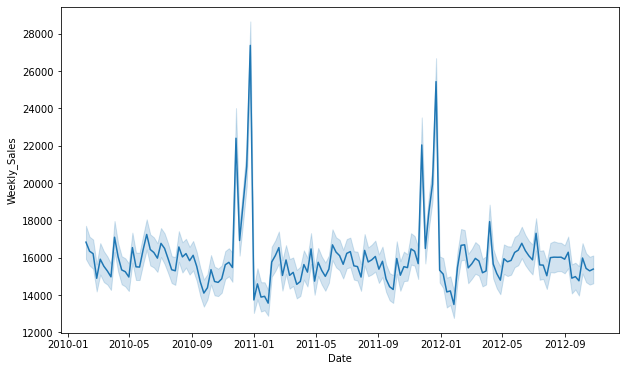

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = df_visualization.index, y = "Weekly_Sales", data = df_visualization)

# 매해 연말에 치솟는 패턴을 볼 수 있음.
# 0, 1, 2 => A, B, C

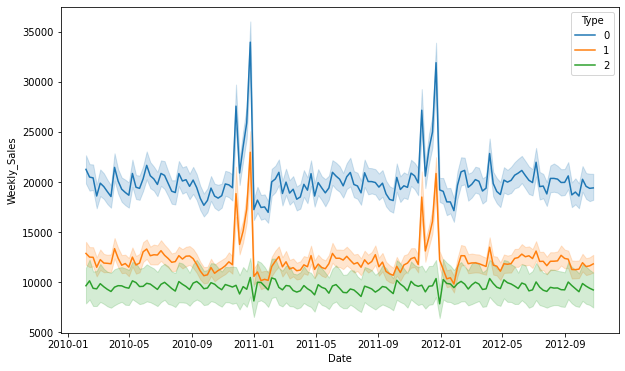

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = df_visualization.index, y = "Weekly_Sales", data = df_visualization, hue = 'Type')

# # 매해 연말에 치솟는 패턴을 볼 수 있음.
# # 0, 1, 2 => A, B, C

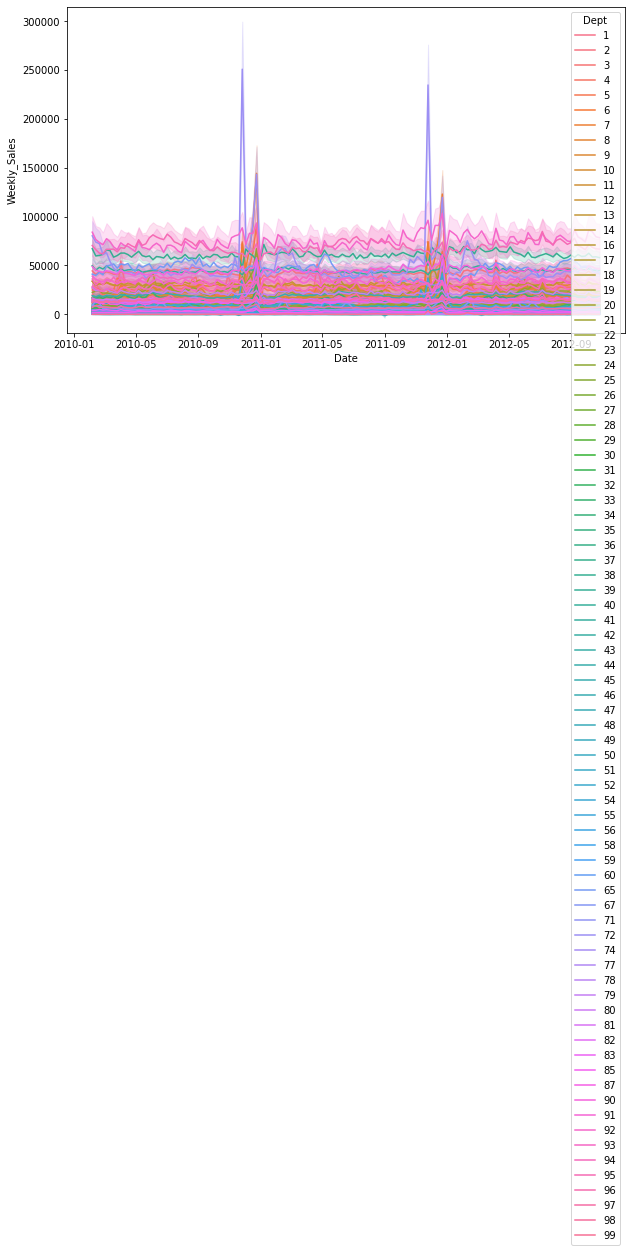

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = df_visualization.index, y = "Weekly_Sales", data = df_visualization, hue = 'Dept')

# # 대부분의 부서도 이를 따르는 것을 알 수 있음.

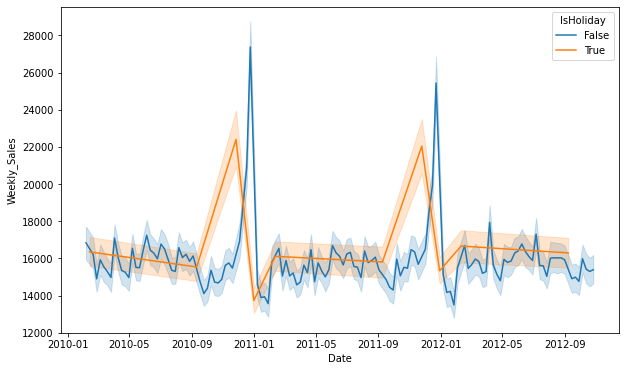

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = df_visualization.index, y = "Weekly_Sales", data = df_visualization, hue = 'IsHoliday')

# ##### False일때는 앞의 시각화 결과처럼 연말에 튀지만, True일 때에는 Thanksgiving날 팍 튐 => False로 바꿔서 일반화하는게 좋을 것 같다.
# ###### **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# ###### **Labor Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# ###### **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# ###### **Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

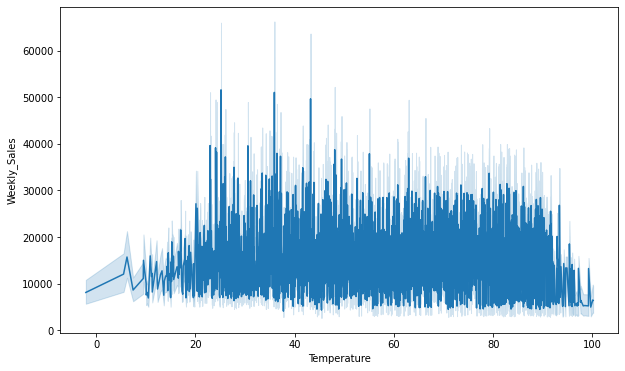

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = "Temperature", y = "Weekly_Sales", data = df_visualization)
# 아무런 패턴이 안보임

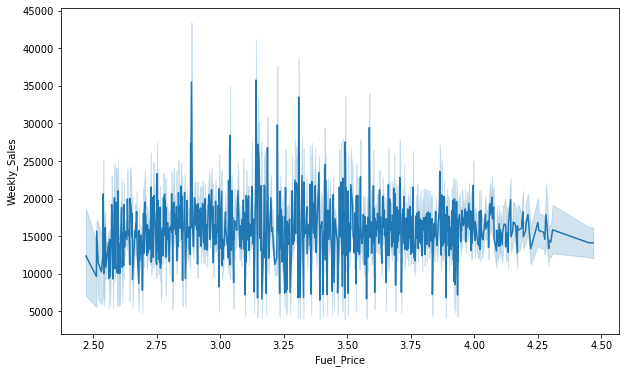

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = "Fuel_Price", y = "Weekly_Sales", data = df_visualization)

# 아무런 패턴이 안보임

KeyboardInterrupt: ignored

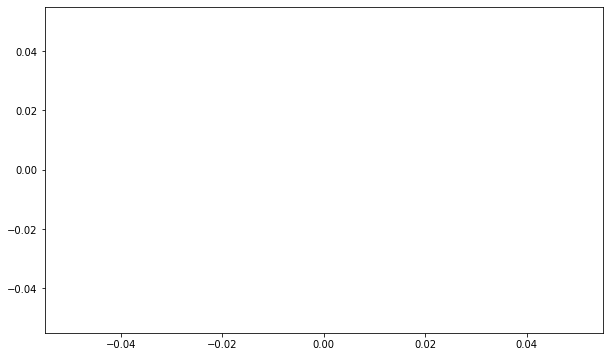

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = "CPI", y = "Weekly_Sales", data = df_visualization);

#CPI: 소비자 물가 지수
# 아무런 패턴이 안보임

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = "Unemployment", y = "Weekly_Sales", data = df_visualization);

# 아무런 패턴이 안보임

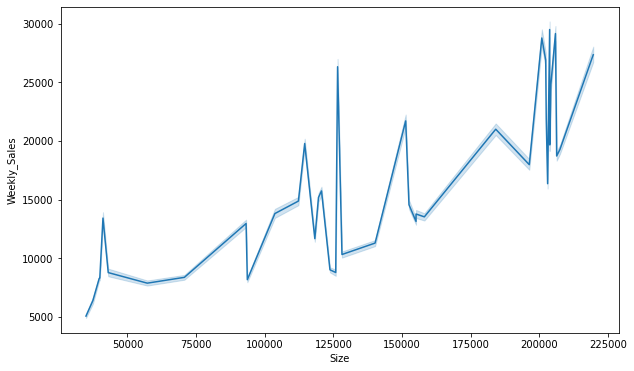

In [ ]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = "Size", y = "Weekly_Sales", data = df_visualization);

# 대체적으로 사이즈가 크면 매출이 높지만 절대적이진 않다. -> 일관성이 없다

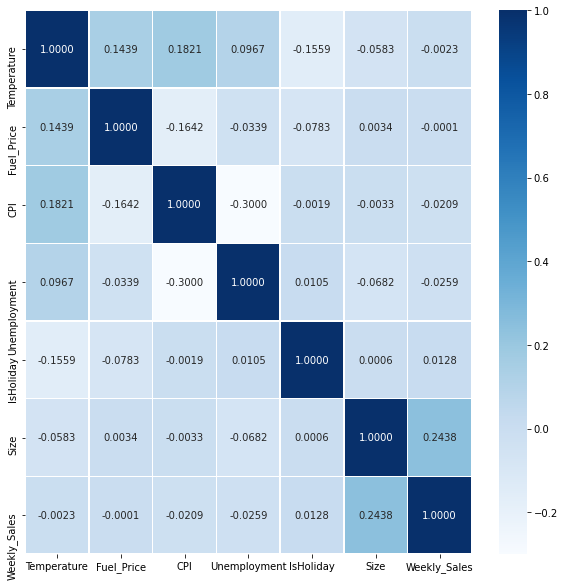

In [ ]:
# 상관계수
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형ㅁ에 False)
mask = np.zeros_like(df_visualization.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(data = df_visualization.corr(), annot=True, fmt = '.4f', mask = mask, linewidths=.5, cmap='Blues')
plt.show()

# 상관 계수는 -1과 +1 사이의 값이 됩니다. 
# 절대 상관이 1에 더 가까울수록 데이터 점이 더 밀접하게 선을 형성합니다. 0에 가까운 상관 값은 선형 관계가 없음을 나타냅니다.

#모델
1. date, temperature, fuel price, cpi, unemployment 항목을 제거
*****제거 이유 다시 확인*****
2. linear_regression, decisiontree, randomfores, stackingclassifer
3. 모델로 항목을 제거했을때와 아닐때의 정확률 비교함
=> 크게 차이 없음(decisionTreeRegressor 제외하고는)

case1: 관련 없는 featuue 제외한 데이터셋으로 학습시키기

LinearRegression	train_score : 0.08505868931973981 	test_score: 0.08739113625631811

DecisionTreeRegressor	train_score : 0.9896491491279583 	test_score: 0.9597349457030421

RandomForestRegressor	train_score : 0.9884880333051507 	test_score: 0.966741314624385

lgb.LGBMRegressor	train_score : 0.9145718056939514 	test_score: 0.9107552613180862

=============================

case2: 관련 없는 featuue 포함한 데이터셋으로 학습시키기

LinearRegression	train_score : 0.08613688806122777 	test_score: 0.08828495078590892

DecisionTreeRegressor	train_score : 1.0 	test_score: 0.9572509907837742

RandomForestRegressor	train_score : 0.9965062371789595 	test_score: 0.9740054896019092

lgb.LGBMRegressor	train_score : 0.9176554031864627 	test_score: 0.9140181043713208

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,StackingClassifier
import lightgbm as lgb
import time

In [ ]:
train_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   CPI           421570 non-null  float64       
 5   Unemployment  421570 non-null  float64       
 6   IsHoliday     421570 non-null  bool          
 7   Type          421570 non-null  category      
 8   Size          421570 non-null  int64         
 9   Dept          421570 non-null  int64         
 10  Weekly_Sales  421570 non-null  float64       
 11  Week          421570 non-null  category      
dtypes: bool(1), category(2), datetime64[ns](1), float64(5), int64(3)
memory usage: 30.2 MB


In [ ]:
# 관련없는 feature """제외"""한 데이터 셋_
x1 = train_total[['Store','Dept','IsHoliday','Size','Week','Type']]
y1 = train_total['Weekly_Sales']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1,test_size=0.2,random_state = 42)

In [ ]:
# 관련없는 feature """포함"""한 데이터 셋
x2 = train_total.drop(['Weekly_Sales', 'Date'],axis=1)
y2 = train_total['Weekly_Sales']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2,test_size=0.2,random_state = 42)

In [ ]:
test_total1 = test_total[['Store','Dept','IsHoliday','Size','Week','Type']]
test_total2 = test_total.drop(['Date'],axis=1)

In [ ]:
model = []

model.append(('LinearRegression', LinearRegression()))  # LinearRegression 모델 
model.append(('DecisionTreeRegressor', DecisionTreeRegressor()))  # DecisionTreeRegressor 모델
model.append(('RandomForestRegressor', RandomForestRegressor()))  # RandomForestRegressor
model.append(('lgb.LGBMRegressor', lgb.LGBMRegressor()))  # lgb.LGBMRegressor()

In [ ]:
print('case1: 관련 없는 featuue 제외한 데이터셋으로 학습시키기')
for name, m in model:
    m.fit(x_train1, y_train1)
    print("{}\ttrain_score : {} \ttest_score: {}".format(name, m.score(x_train1, y_train1), m.score(x_test1, y_test1)))

case1: 관련 없는 featuue 제외한 데이터셋으로 학습시키기
LinearRegression	train_score : 0.08505868931973981 	test_score: 0.08739113625631811
DecisionTreeRegressor	train_score : 0.9896491491279583 	test_score: 0.9597349457030421
RandomForestRegressor	train_score : 0.9884880333051507 	test_score: 0.966741314624385
lgb.LGBMRegressor	train_score : 0.9145718056939514 	test_score: 0.9107552613180862


In [ ]:
print('case2: 관련 없는 featuue 포함한 데이터셋으로 학습시키기')
for name, m in model:
    m.fit(x_train2, y_train2)
    print("{}\ttrain_score : {} \ttest_score: {}".format(name, m.score(x_train2, y_train2), m.score(x_test2, y_test2)))

case2: 관련 없는 featuue 포함한 데이터셋으로 학습시키기
LinearRegression	train_score : 0.08613688806122777 	test_score: 0.08828495078590892
DecisionTreeRegressor	train_score : 1.0 	test_score: 0.9572509907837742
RandomForestRegressor	train_score : 0.9965062371789595 	test_score: 0.9740054896019092
lgb.LGBMRegressor	train_score : 0.9176554031864627 	test_score: 0.9140181043713208


#모델 적용

RandomForest (여기부터)

1) train1 : 관련없는 항목 제외한것

2) train2 : 관련있는 항목 포함한것 

In [ ]:
start = time.time()  # 시작 시간 저장
print("=====train start=======\n")
# param: 아무렇게나

model_rf1 = RandomForestRegressor(n_estimators=100, max_samples = 0.4)
model_rf1.fit(x_train1, y_train1)

print("done!\ntime :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

=====train start=======

done!
time : 46.96432137489319


In [ ]:
print("훈련 세트 정확도: {:.3f}".format(model_rf1.score(x_train1, y_train1)))
print("테스트 세트 정확도: {:.3f}".format(model_rf1.score(x_test1, y_test1)))

훈련 세트 정확도: 0.983
테스트 세트 정확도: 0.967


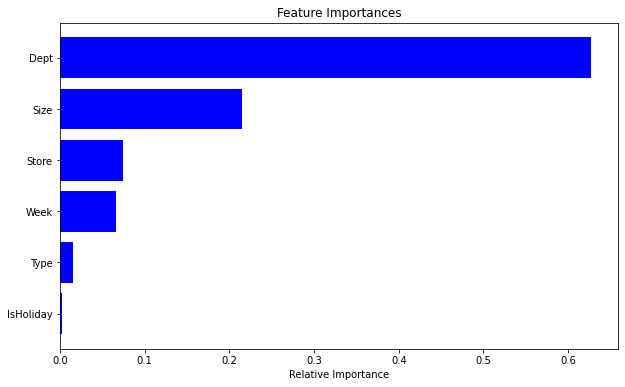

In [ ]:
features = x_train1.columns
importances = model_rf1.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [x_train1.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
start = time.time()  # 시작 시간 저장
print("=====train start=======\n")
# param: 아무렇게나

model_rf2 = RandomForestRegressor(n_estimators=100, max_samples = 0.4)
model_rf2.fit(x_train2, y_train2)

print("done!\ntime :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

=====train start=======

done!
time : 127.47052502632141


In [ ]:
print("훈련 세트 정확도: {:.3f}".format(model_rf2.score(x_train2, y_train2)))
print("테스트 세트 정확도: {:.3f}".format(model_rf2.score(x_test2, y_test2)))

훈련 세트 정확도: 0.987
테스트 세트 정확도: 0.970


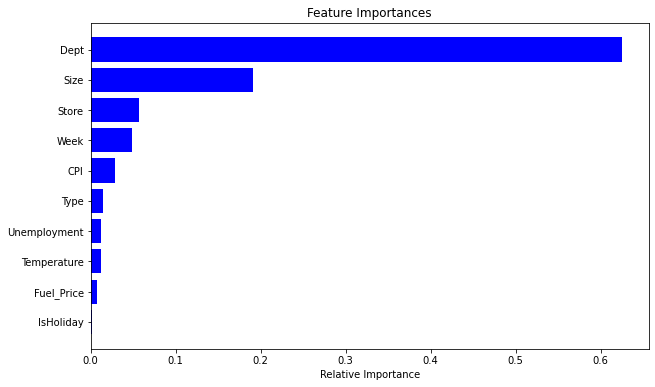

In [ ]:
features = x_train2.columns
importances = model_rf2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [x_train2.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#예측

In [ ]:
# # x_TEST = test_total.drop(['Date'],axis=1)
# # x_TEST

test_pred1 = test_total1.copy()
test_pred2 = test_total2.copy()

In [ ]:
# x_Test data processing 
# CPI, Unemployment의 nan 값이 있어서 예측이 안된다 randomforest...
# 여러 방법이 있겠지만 이전 값으로 대체하는 방법 선택
# 이유는 급격하게 변할 수치가 아니라고 판다.

test_pred1 = test_pred1.fillna(method='ffill')
test_pred2 = test_pred2.fillna(method='ffill')
test_pred2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         115064 non-null  int64   
 1   Temperature   115064 non-null  float64 
 2   Fuel_Price    115064 non-null  float64 
 3   CPI           115064 non-null  float64 
 4   Unemployment  115064 non-null  float64 
 5   IsHoliday     115064 non-null  bool    
 6   Type          115064 non-null  category
 7   Size          115064 non-null  int64   
 8   Dept          115064 non-null  int64   
 9   Week          115064 non-null  category
dtypes: bool(1), category(2), float64(4), int64(3)
memory usage: 6.5 MB


In [ ]:
# model_rf
start = time.time()  # 시작 시간 저장

print("===== predict start! =======\n")
predict_sales1 = model_rf1.predict(test_pred1)

print("========== done! ===========\n")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

===== predict start! =======

========== done! ===========

time : 1.9782674312591553


In [ ]:
df_sample1 = a.copy()
df_sample1['Weekly_Sales'] = predict_sales1
df_sample1

,Id,Weekly_Sales
0,1_1_2012-11-02,33964.241083
1,1_1_2012-11-09,19649.847400
2,1_1_2012-11-16,19512.410643
3,1_1_2012-11-23,20187.701737
4,1_1_2012-11-30,23471.120875
...,...,...
115059,45_98_2013-06-28,714.265750
115060,45_98_2013-07-05,794.585690
115061,45_98_2013-07-12,754.099923
115062,45_98_2013-07-19,548.544562


#예측

In [ ]:
# model_rf
start = time.time()  # 시작 시간 저장

print("===== predict start! =======\n")
predict_sales2 = model_rf2.predict(test_pred2)

print("========== done! ===========\n")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

===== predict start! =======

========== done! ===========

time : 1.9430570602416992


In [ ]:
pred_df = train_total[['Date', 'Weekly_Sales']].copy()
pred_df

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90
...,...,...
421565,2012-09-28,508.37
421566,2012-10-05,628.10
421567,2012-10-12,1061.02
421568,2012-10-19,760.01


In [ ]:
pred_df2 = df_test.copy()
pred_df2['Weekly_Sales'] = predict_sales2
pred_df2 = pred_df2[['Date', 'Weekly_Sales']]
pred_df2

,Date,Weekly_Sales
0,2012-11-02,29449.3338
1,2012-11-09,17933.4933
2,2012-11-16,18287.5511
3,2012-11-23,18222.6911
4,2012-11-30,20928.0500
...,...,...
115059,2013-06-28,745.5605
115060,2013-07-05,769.2800
115061,2013-07-12,774.7357
115062,2013-07-19,739.9129


In [ ]:
pred_df1 = df_test.copy()
pred_df1['Weekly_Sales'] = predict_sales1
pred_df1 = pred_df2[['Date', 'Weekly_Sales']]
pred_df1

,Date,Weekly_Sales
0,2012-11-02,29449.3338
1,2012-11-09,17933.4933
2,2012-11-16,18287.5511
3,2012-11-23,18222.6911
4,2012-11-30,20928.0500
...,...,...
115059,2013-06-28,745.5605
115060,2013-07-05,769.2800
115061,2013-07-12,774.7357
115062,2013-07-19,739.9129


In [ ]:
df_sample2 = a.copy()
df_sample2['Weekly_Sales'] = predict_sales2
df_sample2


pred_df2 = df_test.copy()
pred_df2['Weekly_Sales'] = predict_sales2
pred_df2 = pred_df2[['Date', 'Weekly_Sales']]
pred_df2

pred_df2.Date = pd.to_datetime(pred_df2.Date)
pred_df2['Week'] = pred_df2.Date.dt.week
pred_df2['Year'] = pred_df2.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


In [ ]:
pred_df['Week'] = pred_df.Date.dt.week
pred_df['Year'] = pred_df.Date.dt.year

# pred_df2.Date = pd.to_datetime(pred_df2.Date)
# pred_df2['Week'] = pred_df2.Date.dt.week
# pred_df2['Year'] = pred_df2.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
pred_df['Week'] = pred_df.Date.dt.week
pred_df['Year'] = pred_df.Date.dt.year

pred_df1.Date = pd.to_datetime(pred_df1.Date)
pred_df1['Week'] = pred_df1.Date.dt.week
pred_df1['Year'] = pred_df1.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

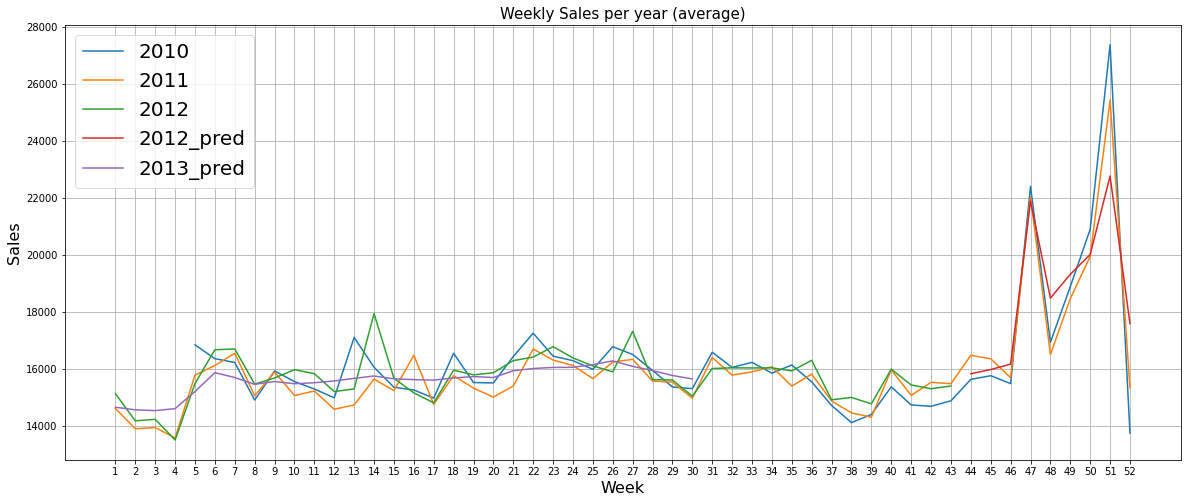

In [ ]:
pred_df_2010 = pred_df[pred_df.Year==2010]['Weekly_Sales'].groupby(pred_df['Week']).mean()
pred_df_2011 = pred_df[pred_df.Year==2011]['Weekly_Sales'].groupby(pred_df['Week']).mean()
pred_df_2012 = pred_df[pred_df.Year==2012]['Weekly_Sales'].groupby(pred_df['Week']).mean()

pred_df1_2012 = pred_df1[pred_df1.Year==2012]['Weekly_Sales'].groupby(pred_df1['Week']).mean()
pred_df1_2013 = pred_df1[pred_df1.Year==2013]['Weekly_Sales'].groupby(pred_df1['Week']).mean()


plt.figure(figsize=(20,8))
sns.lineplot(pred_df_2010.index, pred_df_2010.values)
sns.lineplot(pred_df_2011.index, pred_df_2011.values)
sns.lineplot(pred_df_2012.index, pred_df_2012.values)

sns.lineplot(pred_df1_2012.index, pred_df1_2012.values)
sns.lineplot(pred_df1_2013.index, pred_df1_2013.values)


plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012', '2012_pred', '2013_pred'], loc='best', fontsize=20)
# plt.legend(['2010', '2011', '2012_y', '2013'], loc='best', fontsize=18)
plt.title('Weekly Sales per year (average)', fontsize=15)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

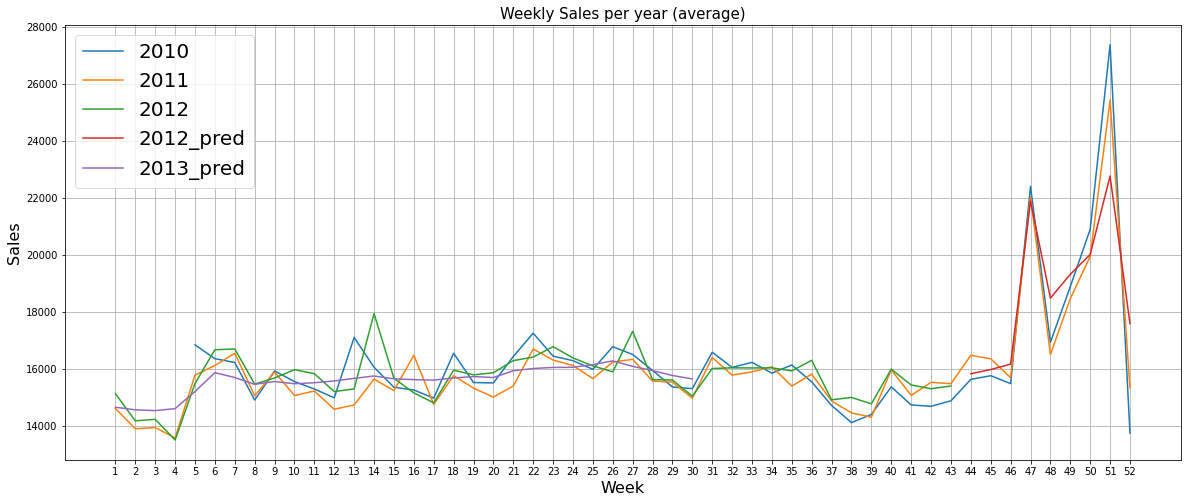

In [ ]:
pred_df_2010 = pred_df[pred_df.Year==2010]['Weekly_Sales'].groupby(pred_df['Week']).mean()
pred_df_2011 = pred_df[pred_df.Year==2011]['Weekly_Sales'].groupby(pred_df['Week']).mean()
pred_df_2012 = pred_df[pred_df.Year==2012]['Weekly_Sales'].groupby(pred_df['Week']).mean()

pred_df2_2012 = pred_df2[pred_df2.Year==2012]['Weekly_Sales'].groupby(pred_df2['Week']).mean()
pred_df2_2013 = pred_df2[pred_df2.Year==2013]['Weekly_Sales'].groupby(pred_df2['Week']).mean()


plt.figure(figsize=(20,8))
sns.lineplot(pred_df_2010.index, pred_df_2010.values)
sns.lineplot(pred_df_2011.index, pred_df_2011.values)
sns.lineplot(pred_df_2012.index, pred_df_2012.values)

sns.lineplot(pred_df2_2012.index, pred_df2_2012.values)
sns.lineplot(pred_df2_2013.index, pred_df2_2013.values)


plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012', '2012_pred', '2013_pred'], loc='best', fontsize=20)
# plt.legend(['2010', '2011', '2012_y', '2013'], loc='best', fontsize=18)
plt.title('Weekly Sales per year (average)', fontsize=15)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [ ]:
train_total[train_total.Week == 51]

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Week
46,1,2010-12-24,52.33,2.886,211.405122,7.838,False,0,151315,1,55931.23,51
98,1,2011-12-23,47.96,3.112,219.357722,7.866,False,0,151315,1,46788.75,51
189,1,2010-12-24,52.33,2.886,211.405122,7.838,False,0,151315,2,59889.32,51
241,1,2011-12-23,47.96,3.112,219.357722,7.866,False,0,151315,2,65615.36,51
332,1,2010-12-24,52.33,2.886,211.405122,7.838,False,0,151315,3,12080.36,51
...,...,...,...,...,...,...,...,...,...,...,...,...
421245,45,2011-12-23,42.27,3.389,188.929975,8.523,False,1,118221,95,54017.86,51
421338,45,2010-12-24,30.59,3.141,182.544590,8.724,False,1,118221,97,6767.35,51
421390,45,2011-12-23,42.27,3.389,188.929975,8.523,False,1,118221,97,6840.54,51
421473,45,2010-12-24,30.59,3.141,182.544590,8.724,False,1,118221,98,222.48,51


#최적화

In [ ]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[50],
    'max_depth':[15,20,25,30],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[3,4,5,6]
}

In [ ]:
rf_optimize = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_optimize, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [ ]:
grid_cv.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 50}

In [ ]:
print(grid_cv.best_score_)

0.964474939987392


In [ ]:
start = time.time()  # 시작 시간 저장
print("=====train start=======\n")
# param: 아무렇게나

model_rf_final = RandomForestRegressor(n_estimators=50,max_depth = 25,
                                  min_samples_leaf = 1, min_samples_split = 6)
model_rf_final.fit(x_train1, y_train1)

print("done!\ntime :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

=====train start=======

done!
time : 1841.0802187919617


In [ ]:
print("훈련 세트 정확도: {:.3f}".format(model_rf_final.score(x_train1, y_train1)))
print("테스트 세트 정확도: {:.3f}".format(model_rf_final.score(x_test1, y_test1)))

훈련 세트 정확도: 0.986
테스트 세트 정확도: 0.966


In [ ]:
test_pred3 = test_total1.copy()

In [ ]:
# model_rf
start = time.time()  # 시작 시간 저장

print("===== predict start! =======\n")
predict_sales3 = model_rf_final.predict(test_pred3)

print("========== done! ===========\n")
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

===== predict start! =======

========== done! ===========

time : 0.9241397380828857


In [ ]:
pred_df3 = df_test.copy()
pred_df3['Weekly_Sales'] = predict_sales3
pred_df3 = pred_df3[['Date', 'Weekly_Sales']]

pred_df3.Date = pd.to_datetime(pred_df3.Date)
pred_df3['Week'] = pred_df3.Date.dt.week
pred_df3['Year'] = pred_df3.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

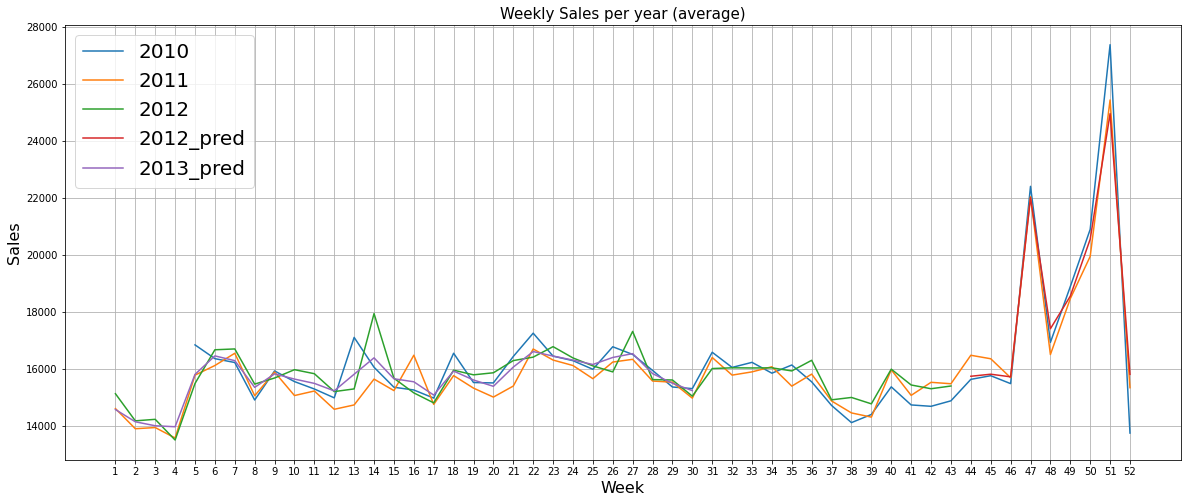

In [ ]:
pred_df_2010 = pred_df[pred_df.Year==2010]['Weekly_Sales'].groupby(pred_df['Week']).mean()
pred_df_2011 = pred_df[pred_df.Year==2011]['Weekly_Sales'].groupby(pred_df['Week']).mean()
pred_df_2012 = pred_df[pred_df.Year==2012]['Weekly_Sales'].groupby(pred_df['Week']).mean()

pred_df3_2012 = pred_df3[pred_df3.Year==2012]['Weekly_Sales'].groupby(pred_df3['Week']).mean()
pred_df3_2013 = pred_df3[pred_df3.Year==2013]['Weekly_Sales'].groupby(pred_df3['Week']).mean()


plt.figure(figsize=(20,8))
sns.lineplot(pred_df_2010.index, pred_df_2010.values)
sns.lineplot(pred_df_2011.index, pred_df_2011.values)
sns.lineplot(pred_df_2012.index, pred_df_2012.values)

sns.lineplot(pred_df3_2012.index, pred_df3_2012.values)
sns.lineplot(pred_df3_2013.index, pred_df3_2013.values)


plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012', '2012_pred', '2013_pred'], loc='best', fontsize=20)
# plt.legend(['2010', '2011', '2012_y', '2013'], loc='best', fontsize=18)
plt.title('Weekly Sales per year (average)', fontsize=15)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [ ]:
pred_final = pred_df3[["Date", "Weekly_Sales"]]
pred_final

,Date,Weekly_Sales
0,2012-11-02,33598.519724
1,2012-11-09,19127.261728
2,2012-11-16,19169.502246
3,2012-11-23,19899.741646
4,2012-11-30,24063.565212
...,...,...
115059,2013-06-28,790.636551
115060,2013-07-05,798.768057
115061,2013-07-12,739.794724
115062,2013-07-19,525.455411


In [ ]:
a['Weekly_Sales'] = pred_final['Weekly_Sales']
a

,Id,Weekly_Sales
0,1_1_2012-11-02,33598.519724
1,1_1_2012-11-09,19127.261728
2,1_1_2012-11-16,19169.502246
3,1_1_2012-11-23,19899.741646
4,1_1_2012-11-30,24063.565212
...,...,...
115059,45_98_2013-06-28,790.636551
115060,45_98_2013-07-05,798.768057
115061,45_98_2013-07-12,739.794724
115062,45_98_2013-07-19,525.455411


In [ ]:
a.to_csv('submission.csv',index=False)
a

,Id,Weekly_Sales
0,1_1_2012-11-02,33598.519724
1,1_1_2012-11-09,19127.261728
2,1_1_2012-11-16,19169.502246
3,1_1_2012-11-23,19899.741646
4,1_1_2012-11-30,24063.565212
...,...,...
115059,45_98_2013-06-28,790.636551
115060,45_98_2013-07-05,798.768057
115061,45_98_2013-07-12,739.794724
115062,45_98_2013-07-19,525.455411
